# Разбор Macro данных 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import xgboost as xgb

### Загрузка данных

In [2]:
df_macro = pd.read_csv('macro.csv')
target = pd.read_csv('train.csv', usecols=['price_doc', 'timestamp'])

In [3]:
df_full = pd.merge_ordered(target, df_macro, on='timestamp', how='left')

In [4]:
target = df_full['price_doc']

In [5]:
del df_full['price_doc']
del df_full['timestamp']

### Обработка пропусков 

In [6]:
mis_val_percent = (100 * df_full.isnull().sum() /len(df_full)).sort_values(ascending=False)[:10]
mis_val_percent

provision_retail_space_modern_sqm         97.528798
provision_retail_space_sqm                81.648124
theaters_viewers_per_1000_cap             55.465853
students_reg_sports_share                 55.465853
load_of_teachers_preschool_per_teacher    55.465853
museum_visitis_per_100_cap                55.465853
old_education_build_share                 18.351876
modern_education_share                    18.351876
sewerage_share                            10.629779
pop_migration                             10.629779
dtype: float64

In [7]:
del df_full['provision_retail_space_modern_sqm']
del df_full['provision_retail_space_sqm']
del df_full['theaters_viewers_per_1000_cap']
del df_full['students_reg_sports_share']
del df_full['load_of_teachers_preschool_per_teacher']
del df_full['museum_visitis_per_100_cap']

In [8]:
###########
# numeric #
###########
for col in df_full._get_numeric_data().columns[df_full._get_numeric_data().columns.isnull().any()].tolist():
    df_full[col].fillna(df_full[col].mean(), inplace=True)

In [9]:
###############
# categorical #
###############
for col in df_full.columns[df_full.isnull().any()].tolist():
    df_full[col].fillna(df_full[col].value_counts().index[0], inplace=True)

### Корреляция 

In [10]:
fs = FeatureSelector(data = df_full, labels = None)
fs.identify_collinear(correlation_threshold = 0.7)
collinear_features = fs.ops['collinear']

No labels provided. Feature importance based methods are not available.
74 features with a correlation magnitude greater than 0.70.



In [11]:
for col in collinear_features:
    df_full = df_full.drop([col], axis = 1)

### Важные параметры 

In [12]:
list(df_full)

['oil_urals',
 'gdp_quart',
 'gdp_quart_growth',
 'balance_trade',
 'balance_trade_growth',
 'net_capital_export',
 'average_provision_of_build_contract',
 'average_provision_of_build_contract_moscow',
 'micex',
 'deposits_growth',
 'mortgage_value',
 'grp_growth',
 'income_per_cap',
 'rent_price_4+room_bus',
 'rent_price_2room_eco',
 'rent_price_1room_eco',
 'child_on_acc_pre_school',
 'modern_education_share',
 'old_education_build_share']

In [13]:
model = xgb.XGBRegressor()

In [14]:
df_full = pd.get_dummies(df_full)

In [15]:
model.fit(df_full, target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

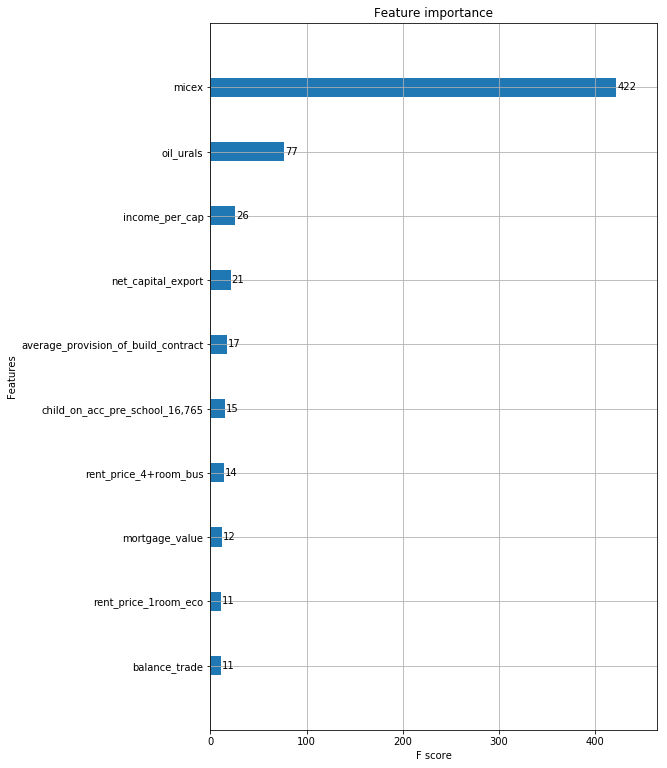

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=10, height=0.3, ax = ax)

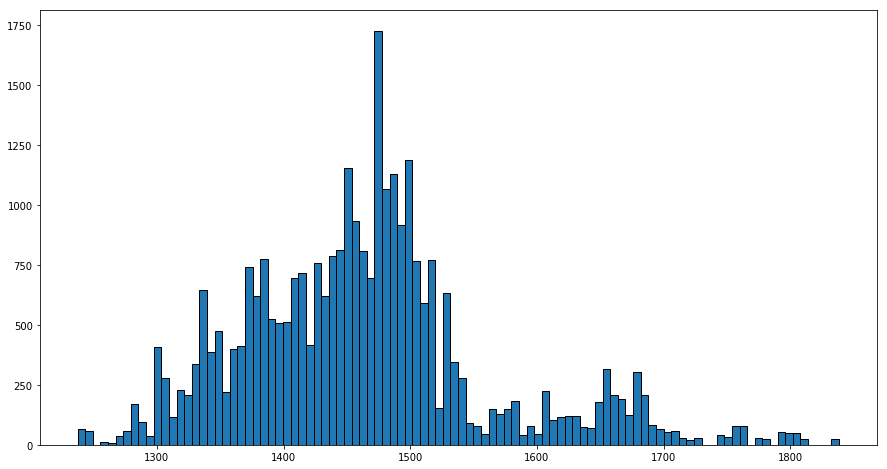

In [17]:
plt.figure(figsize = (15, 8))
plt.hist(df_full['micex'], bins = 100, edgecolor = 'k');

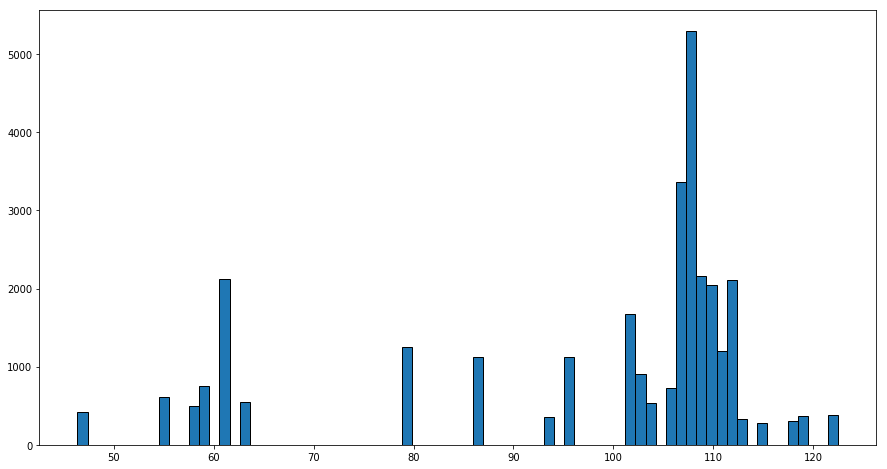

In [18]:
plt.figure(figsize = (15, 8))
plt.hist(df_full['oil_urals'], bins = 75, edgecolor = 'k');

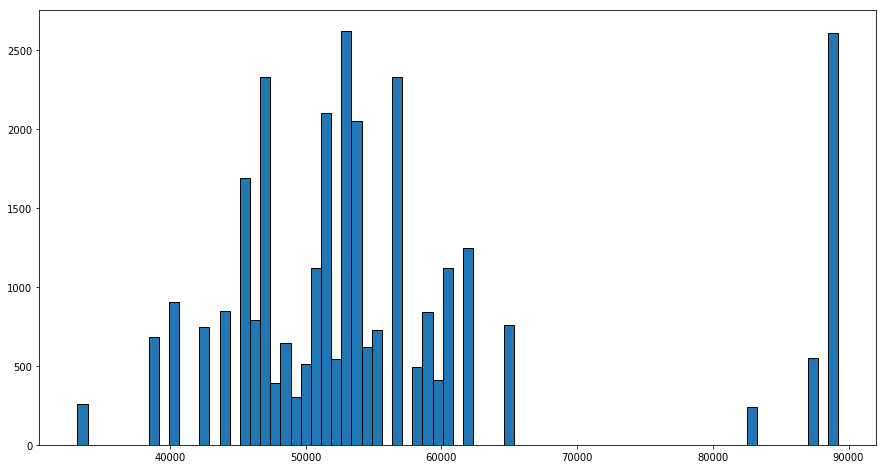

In [19]:
plt.figure(figsize = (15, 8))
plt.hist(df_full['income_per_cap'], bins = 75, edgecolor = 'k');

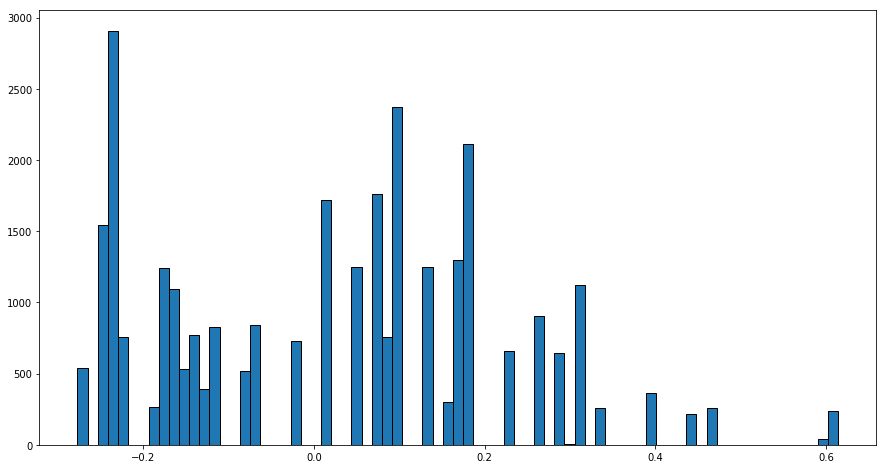

In [20]:
plt.figure(figsize = (15, 8))
plt.hist(df_full['net_capital_export'], bins = 75, edgecolor = 'k');